In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

<b> Exercise 1 : Understanding the problem and Data Collection</b>

In [12]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [16]:
df['smoking_history'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [13]:
sh_num = {'never': 1, 'No Info': 2, 'current': 3, 'former': 4, 'ever': 5, 'not current': 6}

df['smoking_history'] = df['smoking_history'].map(sh_num)

In [14]:
gender_num = {'Female': 1, 'Male': 2, 'Other': 3}

df['gender'] = df['gender'].map(gender_num)

In [15]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,2,27.32,6.6,80,0
2,2,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,2,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,2,27.32,6.2,90,0
99996,1,2.0,0,0,2,17.37,6.5,100,0
99997,2,66.0,0,0,4,27.83,5.7,155,0
99998,1,24.0,0,0,1,35.42,4.0,100,0


In [17]:
X = df.drop('diabetes', axis=1)
y = df['diabetes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

<b>Exercise 2 : Model Picking and Standardization</b>

We can use Logistic Regression because it predicts yes/no outcomes

In [19]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,2,73.0,0,0,4,24.77,3.5,80
48955,2,80.0,0,0,1,24.60,5.7,145
44966,1,38.0,0,0,5,24.33,4.0,158
13568,1,26.0,0,0,6,18.87,5.0,100
92727,1,61.0,1,0,3,22.11,4.5,85
...,...,...,...,...,...,...,...,...
6265,2,49.0,0,0,1,32.98,5.7,80
54886,1,15.0,0,0,1,28.10,5.0,159
76820,2,42.0,0,0,1,26.14,5.8,85
860,1,37.0,0,0,1,24.96,6.2,158


<b>Exercise 3 : Model Training</b>

In [21]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<b>Exercise 4 : Evaluation Metrics</b>

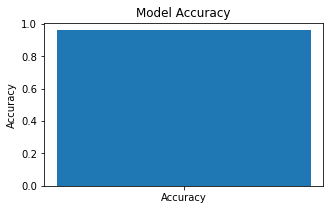

In [29]:
plt.figure(figsize=(5, 3))
plt.bar(['Accuracy'], [accuracy_score(y_test, y_pred)])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

Accuracy represents the overall correctness of the model's predictions. A high accuracy indicates good performance.

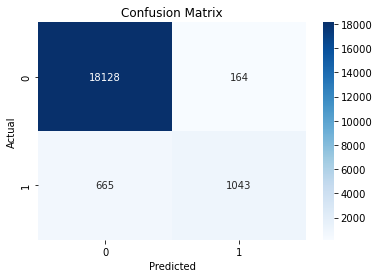

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides a detailed breakdown of correct and incorrect predictions. It helps identify areas where the model is performing well and where it's making mistakes. For example, a high number of false negatives indicates the model is missing many positive cases.

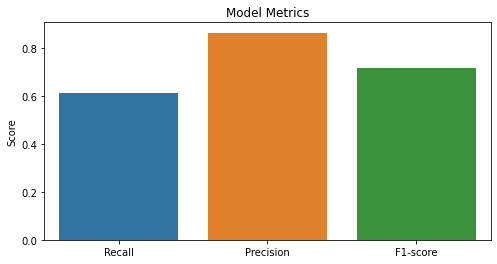

In [33]:
metrics = {'Recall': recall_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred)}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylabel('Score')
plt.title('Model Metrics')
plt.show()

Recall measures the model's ability to correctly identify positive cases. A high recall is important when minimizing false negatives is crucial.<br>
Precision measures the proportion of positive predictions that are actually correct. A high precision is important when minimizing false positives is crucial.<br>
F1-score is the harmonic mean of precision and recall, providing a balance between the two. It's useful when both precision and recall are important.